X.8.1. Сведя задачу $y″ – 10 y′ – 11 y = 0$, $y(0) = 1$,$y′(0) = –1$ к системе
уравнений первого порядка, решить ее численно на интервале $\left[0,10\right]$,
воспользовавшись любым методом. Проанализируйте полученные
результаты.

Метод Рунге

$$
y''(x)=f(x,y,y') \rightarrow \\
y'=u,\\ 
u'=f(x,y,u)
$$

Метод Рунге-Кутты 4-ого порядка 
$$
y(x+h)=y(x)+y'\left(x+\frac{h}{2},y+\frac{h}{2}y'(x,y)\right)
$$

$$
L_1=hu'(x,y,u), 
K_1=hy'(x,y,u) \\
L_2=hu'\left(x+\frac{h}{2},y+\frac{K_1}{2},u+\frac{L_1}{2}\right),
K_2=hy'\left(x+\frac{h}{2},y+\frac{K_1}{2},u+\frac{L_1}{2}\right)\\
L_3=hu'\left(x+\frac{h}{2},y+\frac{K_1}{2},u+\frac{L_1}{2}\right),
K_3=hy'\left(x+\frac{h}{2},y+\frac{K_1}{2},u+\frac{L_1}{2}\right)\\
L_4=hu'\left(x+h,y+K_3,u+L_3\right),
K_4=hy'\left(x+h,y+K_3,u+L_3\right)\\
$$

$$
u(x+h)=u(x)+\frac{1}{6}\left(L_1+2L_2+2L_3+L_4\right)\\
y(x+h)=y(x)+\frac{1}{6}\left(K_1+2K_2+2K_3+K_4\right)
$$

 $$y″ – 10 y′ – 11 y = 0,\; y(0) = 1,\; y′(0) = –1 \rightarrow$$  
 $$ y'=u, \; y(0)=0\\
    u'=11y+10u \; u(0)=-1
 $$

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
# system of the first order ODE's
dy = lambda x, y, u: u
du = lambda x, y, u: -1.1*y - u
# the analytical solution
f = lambda x: 1.0/(np.exp(x))
df = lambda x: -1.0/(np.exp(x))

# initial values
x = 0.0
xn = 10
y = 1.0
u = -1.0
h = 0.00000001
n = int((xn-x)/h)
# plot arrays
xp = np.linspace(x, xn, n+1)
yp = np.empty(n+1, float)
up = np.empty(n+1, float)
yp[0] = y
up[0] = u
# the header of the output table
#print('x \t\t y\'(RK4) \t y(RK4) \t y\'(Exact) \t y(Exact)')
#print('%f \t %f \t %f \t %f \t %f'%(x, u, y, df(x), f(x)))
for i in range(1, n+1):
    L1 = h*du(x, y, u)
    K1 = h*dy(x, y, u)
    
    L2 = h*du(x+h/2, y+K1/2, u+L1/2)
    K2 = h*dy(x+h/2, y+K1/2, u+L1/2)
    
    L3 = h*du(x+h/2, y+K2/2, u+L2/2)
    K3 = h*dy(x+h/2, y+K2/2, u+L2/2)
    
    L4 = h*du(x+h, y+K3, u+L3)
    K4 = h*dy(x+h, y+K3, u+L3)

    u += (L1 + 2*L2 + 2*L3 + L4)/6
    up[i] = u
    y += (K1 + 2*K2 + 2*K3 + K4)/6
    yp[i] = y
    x += h
  #  print('%f \t %f \t %f \t %f \t %f'%(x, u , y, df(x), f(x)))

# Plot

plt.plot(xp, f(xp), color = 'g', lw = 1.5, ls = '-', label='y (Exact)')
plt.plot(xp, df(xp), color = 'b', lw = 1.5, ls = '--', label='y\' (Exact)')
plt.plot(xp, yp, color = 'r', lw = 1.5, ls = '-', label='y (RK4)')
plt.plot(xp, up,  color = 'y', lw = 1.5, ls = '--', label='y\' (RK4)')
plt.xlabel('x')
plt.ylabel('y, y\'')
plt.legend(loc = 'upper left')
plt.grid()
plt.axis([0, 10.0, None, None])
plt.show()


Из графика видно что метод начинает расходится при $x\approx 3.7$

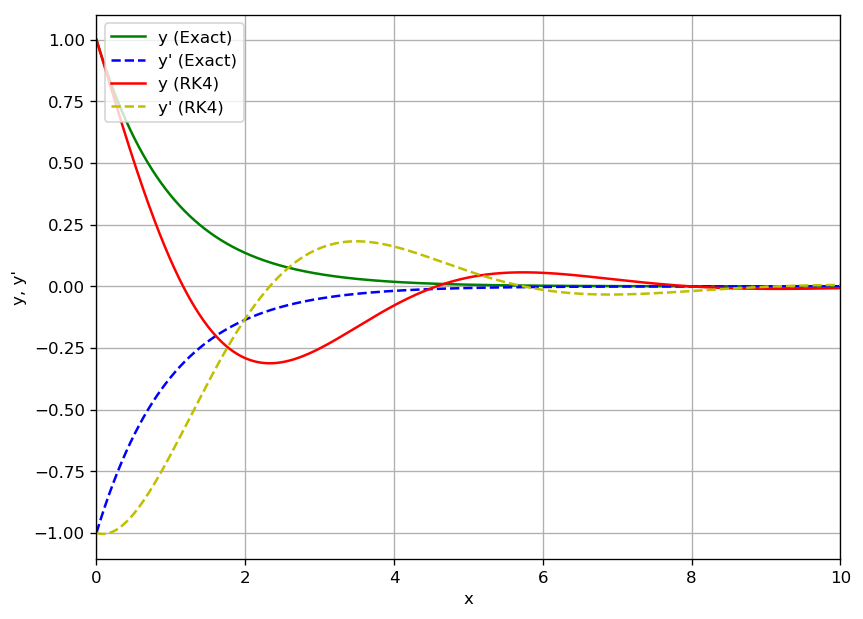

In [4]:
figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
# initial values
x = 0.0
xn = 10
y = 1.0
u = -1.0
h = 0.000001
n = int((xn-x)/h)
# plot arrays
xp = np.linspace(x, xn, n+1)
yp = np.empty(n+1, float)
up = np.empty(n+1, float)
yp[0] = y
up[0] = u
# the header of the output table
#print('x \t\t y\'(RK4) \t y(RK4) \t y\'(Exact) \t y(Exact)')
#print('%f \t %f \t %f \t %f \t %f'%(x, u, y, df(x), f(x)))
for i in range(1, n+1):
    L1 = h*du(x, y, u)
    K1 = h*dy(x, y, u)
    
    L2 = h*du(x+h/2, y+K1/2, u+L1/2)
    K2 = h*dy(x+h/2, y+K1/2, u+L1/2)
    
    L3 = h*du(x+h/2, y+K2/2, u+L2/2)
    K3 = h*dy(x+h/2, y+K2/2, u+L2/2)
    
    L4 = h*du(x+h, y+K3, u+L3)
    K4 = h*dy(x+h, y+K3, u+L3)

    u += (L1 + 2*L2 + 2*L3 + L4)/6
    up[i] = u
    y += (K1 + 2*K2 + 2*K3 + K4)/6
    yp[i] = y
    x += h
  #  print('%f \t %f \t %f \t %f \t %f'%(x, u , y, df(x), f(x)))

# Plot

plt.plot(xp, f(xp), color = 'g', lw = 1.5, ls = '-', label='y (Exact)')
plt.plot(xp, df(xp), color = 'b', lw = 1.5, ls = '--', label='y\' (Exact)')
plt.plot(xp, yp, color = 'r', lw = 1.5, ls = '-', label='y (RK4)')
plt.plot(xp, up,  color = 'y', lw = 1.5, ls = '--', label='y\' (RK4)')
plt.xlabel('x')
plt.ylabel('y, y\'')
plt.legend(loc = 'upper left')
plt.grid()
plt.axis([0, 10.0, None, None])
plt.show()


Ещё замечена особенность расхождения
если мы будем менять размер сетки 
При h = 0.00001 "решения" уходят на $+ \infty$ и при более крупном шаге на $- \infty$  